In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
%matplotlib inline


In [2]:
!git clone 'https://github.com/sachinkavindaa/Machine-learning-with-Python'

Cloning into 'Machine-learning-with-Python'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 108 (delta 29), reused 104 (delta 25), pack-reused 0
Receiving objects: 100% (108/108), 554.73 KiB | 6.45 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [3]:
df = pd.read_csv('/content/Machine-learning-with-Python/ML/Diabetes/diabetes.csv')
df

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


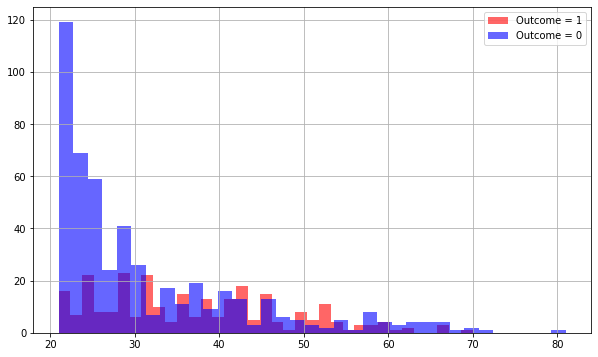

In [21]:
plt.figure(figsize=(10,6))
df[df['Outcome']==1]['Age'].hist(bins=35,color ='red',label = 'Outcome = 1',alpha = 0.6)
df[df['Outcome']==0]['Age'].hist(bins=35,color ='blue',label = 'Outcome = 0',alpha = 0.6)
plt.legend()

In [4]:
df_mod = df[(df.Blood_Pressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]
print(df_mod.shape)

(724, 9)


In [17]:
feature_names = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']
X = df_mod[feature_names]
y = df_mod.Outcome


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
pred_dtree = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       120
           1       0.53      0.57      0.55        61

    accuracy                           0.69       181
   macro avg       0.65      0.66      0.65       181
weighted avg       0.69      0.69      0.69       181



In [25]:
print(confusion_matrix(y_test,pred_dtree))

[[89 31]
 [26 35]]


# Training the random forest model prediction 

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=450)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
pred_rf = rf.predict(X_test)

In [70]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       120
           1       0.68      0.64      0.66        61

    accuracy                           0.78       181
   macro avg       0.75      0.74      0.75       181
weighted avg       0.78      0.78      0.78       181



In [71]:
print(confusion_matrix(y_test,pred_rf))

[[102  18]
 [ 22  39]]


In [47]:
pred_df = pd.DataFrame({'Actual_value' : y_test,'Predicted_value' : pred_rf, 'Difference' : y_test-pred_rf })
pred_df

,Actual_value,Predicted_value,Difference
259,1,1,0
82,0,0,0
92,0,0,0
283,1,1,0
108,0,0,0
...,...,...,...
370,1,1,0
119,0,0,0
766,1,1,0
721,0,0,0


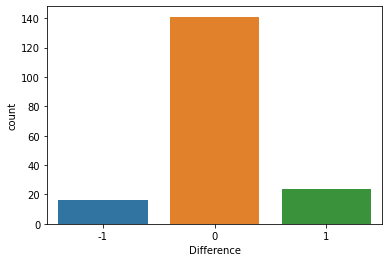

In [48]:
sns.countplot(x = 'Difference', data = pred_df)